<a href="https://colab.research.google.com/github/rohailkhan/Deep-Learning-with-Python-Jb/blob/master/11_Hand_written_digits_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Plot ad hoc mnist instances
from keras.datasets import mnist

In [2]:
# data processing and visualization libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.np_utils import to_categorical
# Keras deep learning model libraries
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization , Conv2D ,MaxPool2D 
from tensorflow.keras.optimizers import SGD ,Adam
# data validation lib
from sklearn.model_selection import KFold



In [3]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


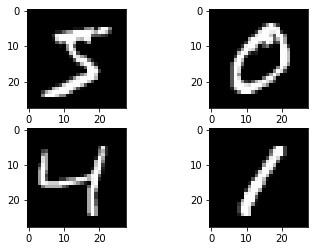

In [5]:
fig , ax =plt.subplots(2,2,figsize=(6,4))
for i in range(4):
  plt.subplot(220 + 1 +i)
  plt.imshow(X_train[i],cmap='gray')

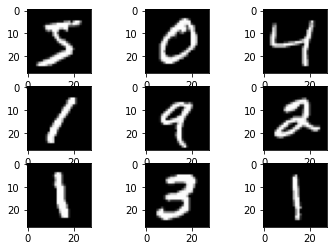

In [6]:
fig =plt.subplots(2,2,figsize=(6,4))
for i in range(9):
  plt.subplot(330 + 1 +i)
  plt.imshow(X_train[i],cmap='gray')

# Data Preprocessing

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
def data_load_process():
  from keras.datasets import mnist
  (X_train, y_train), (X_test, y_test) = mnist.load_data()
  # pre processing for 2D Conv layers [samples][width][height][channel] .Becuase gray channel=1
  X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
  X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
  #  rescaling to change 0-255 pixels to values between 0-1
  X_train=(X_train/255.0).astype('float')
  X_test=(X_test/255.0).astype('float')
  # one hot encoding for the y labels
  y_train= to_categorical(y_train)
  y_test=to_categorical(y_test)
  return X_train, y_train, X_test, y_test

  

In [11]:
X_train, y_train, X_test, y_test=data_load_process()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

# Base Line Model

In [12]:
# from tensorflow.keras.optimizers import SGD ,Adam

In [6]:
def base_model():
  model = Sequential()
  model.add(Dropout(0.2))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPool2D((2, 2)))

  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPool2D((2, 2)))
  

  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = Adam(learning_rate=0.01)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# Training Model and evaluation
# Steps
##1-  Only the training data will be used fpr Cross validation
##2-  Once a better model architecture is selected. The selected
##3-  model will be evaluated on the actual Test data

In [14]:
kfold=KFold(n_splits=3,shuffle=True)
kfold.split(X_train)

<generator object _BaseKFold.split at 0x7f83dc46d150>

In [15]:
kfold=KFold(n_splits=3,shuffle=True)
for i,j in kfold.split(X_train):
  print(X_train[i].shape  , X_train[j].shape)

(40000, 28, 28, 1) (20000, 28, 28, 1)
(40000, 28, 28, 1) (20000, 28, 28, 1)
(40000, 28, 28, 1) (20000, 28, 28, 1)


In [11]:
def model_training_evaluation(Xtrain,ytrain,model):
  histories , accuracy = list() , list()
  kfold=KFold(n_splits=6,shuffle=True)
  for train_i , test_i in kfold.split(Xtrain):
    X_train , y_train , X_test , y_test=Xtrain[train_i] , ytrain[train_i] , Xtrain[test_i] , ytrain[test_i]
    history=model.fit(x=X_train,y=y_train,batch_size=32,epochs=6, verbose="auto",validation_data=(X_test , y_test) )
    _, acc=model.evaluate(X_test , y_test)
    print('accuracy={}'.format(acc * 100.0))
    accuracy.append(acc)
    histories.append(history)
  return histories , accuracy

In [17]:
# # vimportant . The same above function doesnt work if the following parameters are used
# i.e the model_training_evaluation(Xtrain,ytrain,mode)  is replaced by model_training_evaluation(X_train,y_train,model)
# this creates the problem of mismatch of the lenght of data when using for loop
# def model_training_evaluation(X_train,y_train,model):
#   histories , accuracy = list() , list()
#   kfold=KFold(n_splits=3,shuffle=True)
#   for train_i , test_i in kfold.split(X_train):
#     X_train , y_train , X_test , y_test=X_train[train_i] , y_train[train_i] , X_train[test_i] , y_train[test_i]
#     history=model.fit(x=X_train,y=y_train,batch_size=32,epochs=2, verbose="auto",validation_data=(X_test , y_test) )
#     _, acc=model.evaluate(X_test , y_test)
#     print('accuracy={}'.format(acc * 100.0))
#     accuracy.append(acc)
#     histories.append(history)
#   return histories , accuracy

In [7]:
def evaluate_model(Xtrain, ytrain,model ):
  # histories=[]
  # scores=[]
  scores, histories = list(), list()
  
  kfold=KFold(n_splits=3,shuffle=True,random_state=7)
  for train_index , test_index in kfold.split(Xtrain):
    X_train , y_train , X_test , y_test = Xtrain[train_index], ytrain[train_index] , Xtrain[test_index], ytrain[test_index]
    history=model.fit(x=X_train, y= y_train, batch_size=200, epochs=5, verbose='auto', callbacks=None, validation_data=(X_test , y_test))
    _ , acc=model.evaluate(x=X_test,y=y_test)
    print('accuracy={}'.format(acc * 100.0))
    histories.append(history)
    scores.append(acc)
  return histories , scores

# Training run

In [13]:
def training_run():
  X_train, y_train, X_test, y_test=data_load_process()
  model=base_model()
  histories , scores =model_training_evaluation(X_train,y_train,model)
  return histories , scores


In [14]:
 histories , accuracy=training_run()

Epoch 1/6
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2373 - accuracy: 0.9316 - val_loss: 0.1180 - val_accuracy: 0.9640
Epoch 2/6
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1287 - accuracy: 0.9623 - val_loss: 0.1195 - val_accuracy: 0.9623
Epoch 3/6
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1185 - accuracy: 0.9657 - val_loss: 0.1647 - val_accuracy: 0.9542
Epoch 4/6
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1129 - accuracy: 0.9673 - val_loss: 0.1253 - val_accuracy: 0.9633
Epoch 5/6
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1053 - accuracy: 0.9689 - val_loss: 0.0936 - val_accuracy: 0.9731
Epoch 6/6
313/313 [==============================] - 1s 4ms/step - loss: 0.1707 - accuracy: 0.9507
accuracy=95.06999850273132
Epoch 1/6
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1090 - accuracy: 0.9687 - val_loss: 0.0933 - val_accuracy: 0.9718
Epoch 2/6


by mistake I names model score result to accuracy. So changing it to score

In [18]:
scores=accuracy
scores

[0.9506999850273132,
 0.972599983215332,
 0.9613000154495239,
 0.9721999764442444,
 0.9329000115394592,
 0.9643999934196472]

In [16]:
for i in histories:
  print(i.history)

{'loss': [0.2372909039258957, 0.12869088351726532, 0.11848907172679901, 0.1128508672118187, 0.10533367842435837, 0.10052946954965591], 'accuracy': [0.9315599799156189, 0.9622600078582764, 0.9656800031661987, 0.9672600030899048, 0.9689199924468994, 0.9706400036811829], 'val_loss': [0.11800236999988556, 0.1194903776049614, 0.16468244791030884, 0.12531103193759918, 0.09361252933740616, 0.17065413296222687], 'val_accuracy': [0.9639999866485596, 0.9623000025749207, 0.954200029373169, 0.9632999897003174, 0.9731000065803528, 0.9506999850273132]}
{'loss': [0.10903839766979218, 0.09615246206521988, 0.0928567573428154, 0.09684865921735764, 0.08968380838632584, 0.0924905389547348], 'accuracy': [0.9686999917030334, 0.9724000096321106, 0.9727200269699097, 0.9726399779319763, 0.9745799899101257, 0.9744399785995483], 'val_loss': [0.09331344068050385, 0.0798582062125206, 0.07536759227514267, 0.1310359686613083, 0.23575612902641296, 0.09200198203325272], 'val_accuracy': [0.9718000292778015, 0.975000023

In [15]:
len(histories)

6

# Model Accruacy and Loss results

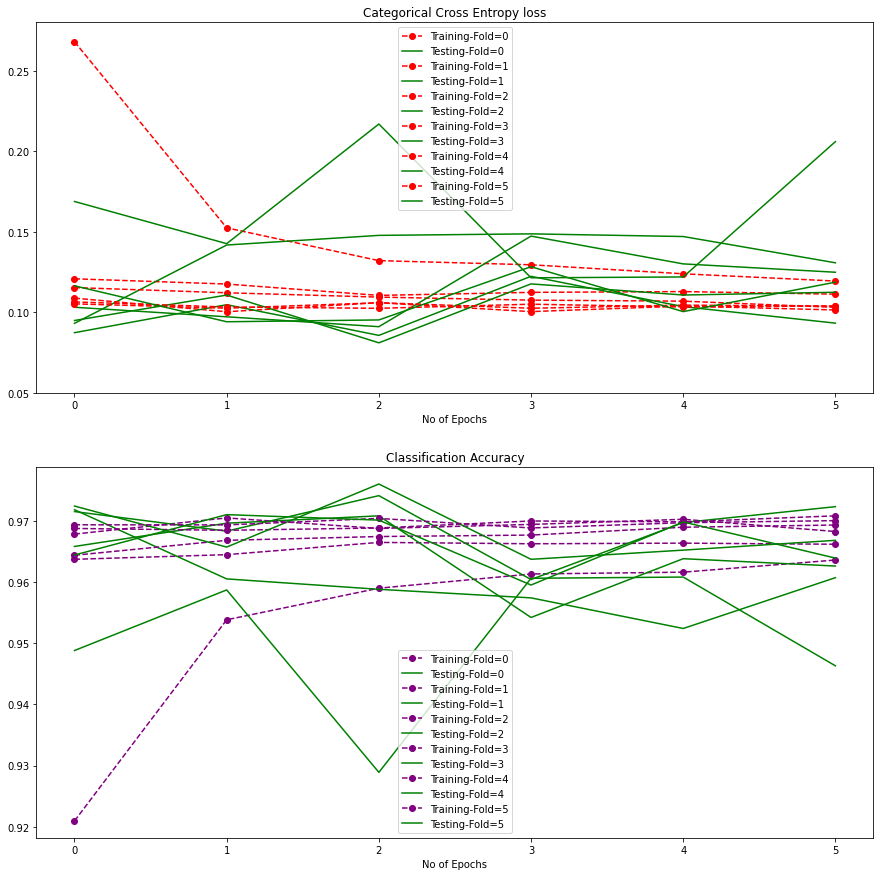

In [42]:
def accruacy_Loss_results():
    fig ,axx = plt.subplots(2,1, figsize=(15,15))
    for i in range(6):
     
      axx[0].plot(histories[i].history['loss'] ,'--o' ,label='Training-Fold='+str(i) ,color='r')
      axx[0].plot(histories[i].history['val_loss'] , label='Testing-Fold='+str(i) ,color='green')
      axx[0].legend()
      axx[0].set_title('Categorical Cross Entropy loss')
      axx[0].set_xlabel('No of Epochs')
      axx[0].set_ylim(0.05, 0.28)
      
      axx[1].plot(histories[i].history['accuracy'] ,'--o' ,label='Training-Fold='+str(i), color='purple')
      axx[1].plot(histories[i].history['val_accuracy'], label='Testing-Fold='+str(i) ,color='green')
      axx[1].legend()
      axx[1].set_title('Classification Accuracy')
      axx[1].set_xlabel('No of Epochs')
      
    plt.show()
accruacy_Loss_results()

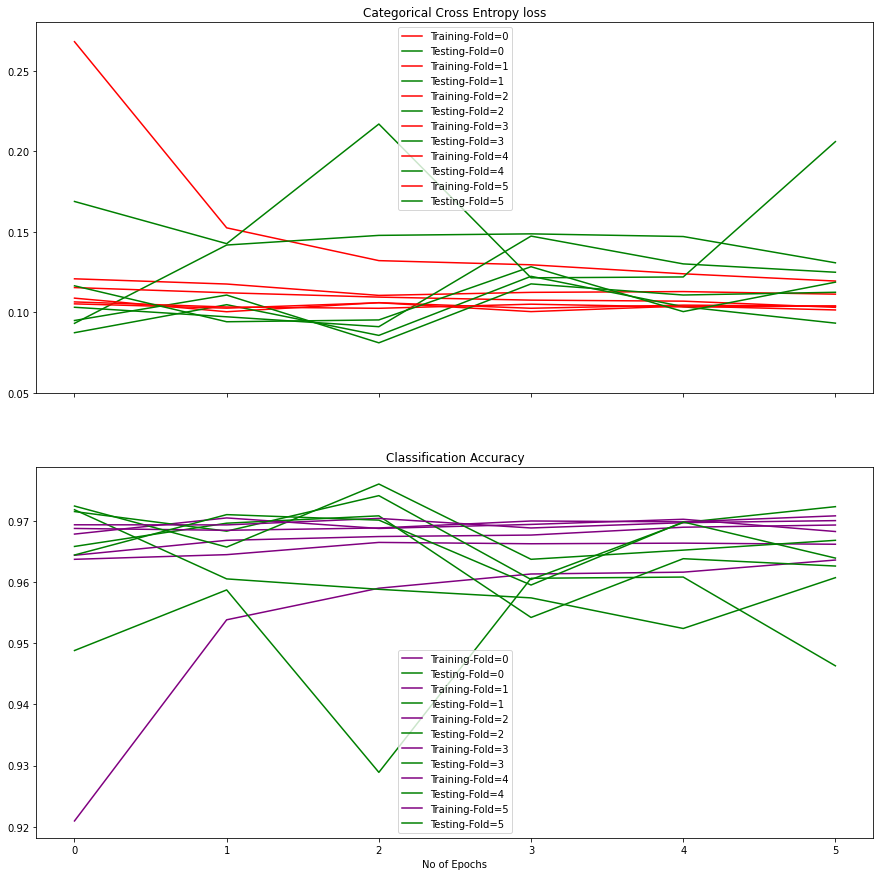

In [38]:
# removing outer labels
def accruacy_Loss_results():
    fig ,axx = plt.subplots(2,1, figsize=(15,15))
    for i in range(6):
     
      axx[0].plot(histories[i].history['loss']  ,label='Training-Fold='+str(i) ,color='r')
      axx[0].plot(histories[i].history['val_loss'] , label='Testing-Fold='+str(i) ,color='green')
      axx[0].legend()
      axx[0].set_title('Categorical Cross Entropy loss')
      axx[0].set_xlabel('No of Epochs')
      axx[0].set_ylim(0.05, 0.28)
      # sharing
      
      axx[1].plot(histories[i].history['accuracy']  ,label='Training-Fold='+str(i), color='purple')
      axx[1].plot(histories[i].history['val_accuracy'], label='Testing-Fold='+str(i) ,color='green')
      axx[1].legend()
      axx[1].set_title('Classification Accuracy')
      axx[1].set_xlabel('No of Epochs')
    for ax in axx.flat:
      ax.label_outer()
      
    plt.show()
accruacy_Loss_results()

# Model performance Score results

In [ ]:
# just a box plot of the scores
import numpy as np
def performance_score_results(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
	fig , axx=plt.subplot(figsize=(8,8))
 fig.subtitle('Model score Mean ,Stanard Deviation and lenght ')
  axx.boxplot(scores)
  plt.show()

In [47]:
import numpy as np
def performance_score_results(scores):
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
  fig , axx=plt.subplots(figsize=(8,8))
  axx.set_title('Model score Mean ,Stanard Deviation and lenghth ')
  axx.boxplot(scores)
  plt.show()

Accuracy: mean=95.902 std=1.381, n=6


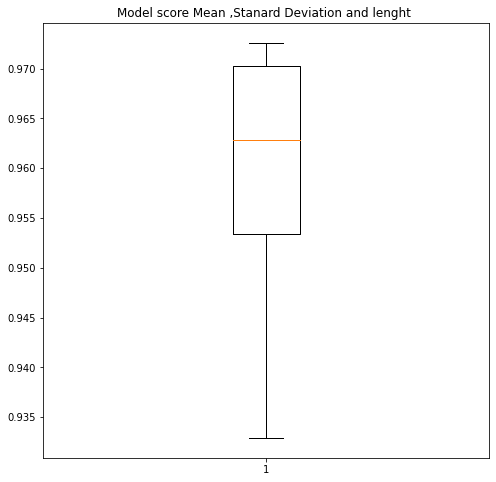

In [46]:
performance_score_results(scores)

# **Saving the Final Model**
# Steps
 

1.   **Using different model architecture are used and Kfold cross validation is done**
2.   **Best model architecture is found (in order to save time..this step is skipped in the notebook)**
2.   **The final chosen architecutr of model is trained on the Full data (without using Kfold cross validation)**


In [49]:
# we skip Step1 and step2 and jumpt to step 3 here to save time
# fit model

X_train, y_train, X_test, y_test =  data_load_process()
model=base_model()

In [50]:
# fit model
history=model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=0)

# **Saving Model & Training History(with acc & loss data )**

In [52]:
# saving model
import os
os.getcwd()

'/content'

In [53]:
# saving model
import os
path=os.getcwd()
model_path= path +'/digits_model1.h5'
# saving model
model.save(model_path,overwrite=True)

# saving model history 

import json
# # Get the dictionary containing each metric and the loss for each epoch
history_dict = history.history

# # Save it under the form of a json file
history_path=path +'/history_digits_model1.json'
json.dump(str(history_dict), open(history_path, 'w'))

# **Using Model Evalutation (only) on the Test Data**
## This time ,no training is required. Simply load the previously saved model (that was trainined using the training data)

In [58]:
def training_run():
  X_train, y_train, X_test, y_test=data_load_process()
  from keras.models import load_model

  model = load_model(os.getcwd() +'/digits_model1.h5') 
  loss, acc = model.evaluate(X_test, y_test)
  
  return loss, acc

In [59]:
loss , acc =training_run()

313/313 [==============================] - 1s 4ms/step - loss: 0.0679 - accuracy: 0.9806


# **Result: we got 98% acuracy and 0.06 loss on the unseen Test data**

# **Make prediction**

## 1- Take few images
Taking 6 images from the test data 

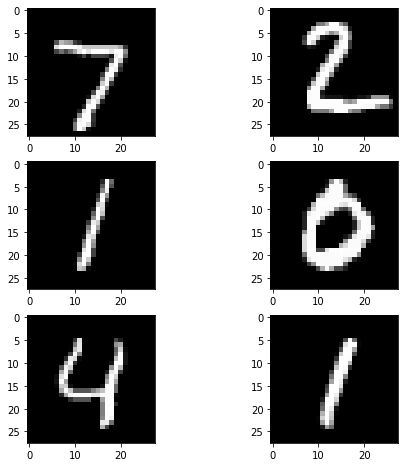

In [60]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
fig = plt.figure(figsize=(8,8))
for i in range(6):
	# define subplot
	plt.subplot(320 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_test[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

## 2-Load the save model

In [61]:
from keras.models import load_model 
model_path=os.getcwd() +'/digits_model1.h5'
loaded_model = load_model(model_path) 

# Predict on the first 5 test images.
predictions = loaded_model.predict(X_test[:6])
# Print our model's predictions.
import numpy as np
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4,1]


[7 2 1 0 4 1]


In [68]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [67]:
# Check our predictions against the ground truths.
# No need for argmax when checking the original class from the y-test 
print(y_test[:6]) # [7, 2, 1, 0, 4]

[7 2 1 0 4 1]


## Some information about argmax

In [70]:
probs = np.array([[0.4, 0.5, 0.1], [0.0, 0.0, 1.0], [0.9, 0.0, 0.1], [0.3, 0.3, 0.4]])
print(probs.shape)
probs

(4, 3)


array([[0.4, 0.5, 0.1],
       [0. , 0. , 1. ],
       [0.9, 0. , 0.1],
       [0.3, 0.3, 0.4]])

In [73]:
# get argmax
result = np.argmax(probs, axis=1)
print(result)

[1 2 0 2]


In [74]:
predictions = loaded_model.predict(X_test[:6])
# the model is giving one-hot encoded results .Therefore we see 10 columns
# each columns is for 10 classes. If we see the position of 1 in first row, it is at 7
# so it shows the class 7 which exactly the real class..i.e 7..we can find the
# class or the maximum value in the rows using argmax and axis=1 (i.e max pos in the column)
predictions 

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [75]:
np.argmax(predictions ,axis=1)

array([7, 2, 1, 0, 4, 1])